# Airline Data EDA #

## About the Data ##

The data comes from the U.S. International Air Passenger and Freight Statistics Report. As part of the T-100 program, USDOT receives traffic reports of US and international airlines operating to and from US airports. There are two datasets available:

Departures: Data on all flights between US gateways and non-US gateways, irrespective of origin and destination.

Each observation provides information on a specific airline for a pair of airports, one in the US and the other outside. Three main columns record the number of flights: Scheduled, Charter, and Total.
Passengers: Data on the total number of passengers for each month and year between a pair of airports, as serviced by a particular airline.

U.S. International Air Passenger and Freight data are confidential for a period of 6 months, after which it can be released. As a result, quarterly reports and the year to date/calendar year raw data files available here will always lag by two quarters.

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt

In [24]:
os.chdir(r'C:\Users\Greg.Bone\DataspellProjects\Airline Data EDA')

## Get the Data ##

In [25]:
passengers = pd.read_csv('International_Report_Passengers.csv')
departures = pd.read_csv('International_Report_Departures.csv')

## Data Inspection and Cleaning ##

#### Passengers ##

In [26]:
passengers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 680985 entries, 0 to 680984
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   data_dte      680985 non-null  object
 1   Year          680985 non-null  int64 
 2   Month         680985 non-null  int64 
 3   usg_apt_id    680985 non-null  int64 
 4   usg_apt       680985 non-null  object
 5   usg_wac       680985 non-null  int64 
 6   fg_apt_id     680985 non-null  int64 
 7   fg_apt        680985 non-null  object
 8   fg_wac        680985 non-null  int64 
 9   airlineid     680985 non-null  int64 
 10  carrier       678188 non-null  object
 11  carriergroup  680985 non-null  int64 
 12  type          680985 non-null  object
 13  Scheduled     680985 non-null  int64 
 14  Charter       680985 non-null  int64 
 15  Total         680985 non-null  int64 
dtypes: int64(11), object(5)
memory usage: 83.1+ MB


In [27]:
passengers.isna().mean().sort_values(ascending=False)

carrier         0.004107
data_dte        0.000000
Year            0.000000
Month           0.000000
usg_apt_id      0.000000
usg_apt         0.000000
usg_wac         0.000000
fg_apt_id       0.000000
fg_apt          0.000000
fg_wac          0.000000
airlineid       0.000000
carriergroup    0.000000
type            0.000000
Scheduled       0.000000
Charter         0.000000
Total           0.000000
dtype: float64

The data only has a small amount of the carrier variable missing. Let's inspect those particular parts of the data.

In [28]:
passengers['carrier'] = passengers.carrier.fillna('None')

In [29]:
# Get Right Dtypes for each column #

passengers = passengers.astype({'Year':object, 'Month':object,'usg_apt_id':object, 'usg_apt':object, 'usg_wac':object, 'fg_apt_id':object, 'fg_apt':object, 'fg_wac':object,'airlineid':object,'carrier':object,'carriergroup':object,'type':object})

#### Departures ####

In [30]:
departures.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 930808 entries, 0 to 930807
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   data_dte      930808 non-null  object
 1   Year          930808 non-null  int64 
 2   Month         930808 non-null  int64 
 3   usg_apt_id    930808 non-null  int64 
 4   usg_apt       930808 non-null  object
 5   usg_wac       930808 non-null  int64 
 6   fg_apt_id     930808 non-null  int64 
 7   fg_apt        930808 non-null  object
 8   fg_wac        930808 non-null  int64 
 9   airlineid     930808 non-null  int64 
 10  carrier       927753 non-null  object
 11  carriergroup  930808 non-null  int64 
 12  type          930808 non-null  object
 13  Scheduled     930808 non-null  int64 
 14  Charter       930808 non-null  int64 
 15  Total         930808 non-null  int64 
dtypes: int64(11), object(5)
memory usage: 113.6+ MB


In [31]:
departures.isna().mean().sort_values(ascending=False)

carrier         0.003282
data_dte        0.000000
Year            0.000000
Month           0.000000
usg_apt_id      0.000000
usg_apt         0.000000
usg_wac         0.000000
fg_apt_id       0.000000
fg_apt          0.000000
fg_wac          0.000000
airlineid       0.000000
carriergroup    0.000000
type            0.000000
Scheduled       0.000000
Charter         0.000000
Total           0.000000
dtype: float64

In [32]:
# Fill NAs with 'None'

departures['carrier'] = departures.carrier.fillna('None')

In [33]:
# Get Right Dtypes for each column #

departures = departures.astype({'Year':object, 'Month':object,'usg_apt_id':object, 'usg_apt':object, 'usg_wac':object, 'fg_apt_id':object, 'fg_apt':object, 'fg_wac':object,'airlineid':object,'carrier':object,'carriergroup':object,'type':object})

In [34]:
# Change Date Columns to datetime objects #

departures['data_dte'] = pd.to_datetime(departures['data_dte'],format='%m/%d/%Y')
departures['Year'] = departures.data_dte.dt.year
departures['Month'] = departures.data_dte.dt.month
departures['year_month'] = pd.to_datetime(departures.Year.astype(str) + departures.Month.astype(str), format='%Y%m')

In [35]:
# Change Date Columns to datetime objects #

passengers['data_dte'] = pd.to_datetime(passengers['data_dte'],format='%m/%d/%Y')
passengers['Year'] = passengers.data_dte.dt.year
passengers['Month'] = passengers.data_dte.dt.month
passengers['year_month'] = pd.to_datetime(passengers.Year.astype(str) + passengers.Month.astype(str), format='%Y%m')

## Establish Questions ##

#### What are the busiest airports in the United States? Outside of the United States? ###

In [36]:
# Create Top Ten List for graphing #

# Passengers
toptenpassdfus = passengers.groupby('usg_apt').sum().sort_values(by='Total', ascending=False)[0:9].reset_index()
# Now for Departures #
toptendeptdfus = departures.groupby('usg_apt').sum().sort_values(by='Total', ascending=False)[0:9].reset_index()

# Passengers
toptenpassfg = passengers.groupby('fg_apt').sum().sort_values(by='Total', ascending=False)[0:9].reset_index()
# Now for Departures #
toptendeptfg = departures.groupby('fg_apt').sum().sort_values(by='Total', ascending=False)[0:9].reset_index()

Let's take a look at the top ten busiest airports, we will view it by percentage of chartered vs. scheduled flights

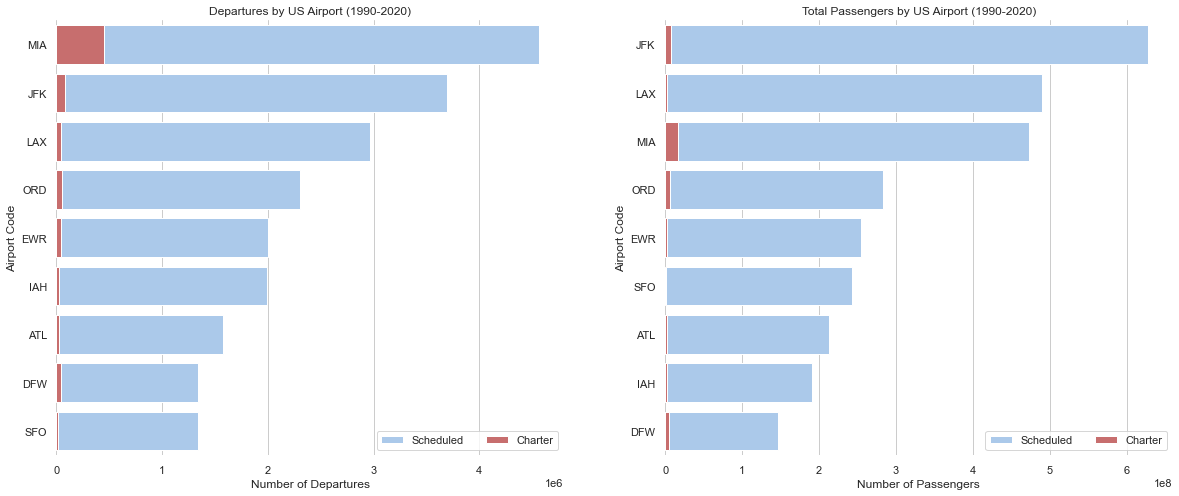

In [37]:

sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, axes = plt.subplots(nrows=1,ncols=2,figsize=(20,8))


# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(ax=axes[0], x="Scheduled", y="usg_apt", data=toptendeptdfus,
            label="Scheduled", color="b")

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(ax=axes[0], x="Charter", y="usg_apt", data=toptendeptdfus,
            label="Charter", color="r")

# Add a legend and informative axis label
axes[0].legend(ncol=2, loc="lower right", frameon=True)
axes[0].set(ylabel="Airport Code",
       xlabel="Number of Departures", title='Departures by US Airport (1990-2020)')
sns.despine(left=True, bottom=True)

# 2nd plot

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(ax=axes[1], x="Scheduled", y="usg_apt", data=toptenpassdfus,
            label="Scheduled", color="b")

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(ax=axes[1], x="Charter", y="usg_apt", data=toptenpassdfus,
            label="Charter", color="r")

# Add a legend and informative axis label
axes[1].legend(ncol=2, loc="lower right", frameon=True)
axes[1].set(ylabel="Airport Code",
            xlabel="Number of Passengers", title='Total Passengers by US Airport (1990-2020)')
sns.despine(left=True, bottom=True)

JFK now takes first place, followed by LAX and Miami. So Miami has the most departures, but LAX and JFK have far more passengers passing through. Miami also has way more chartered departures and flights vs. other airports.

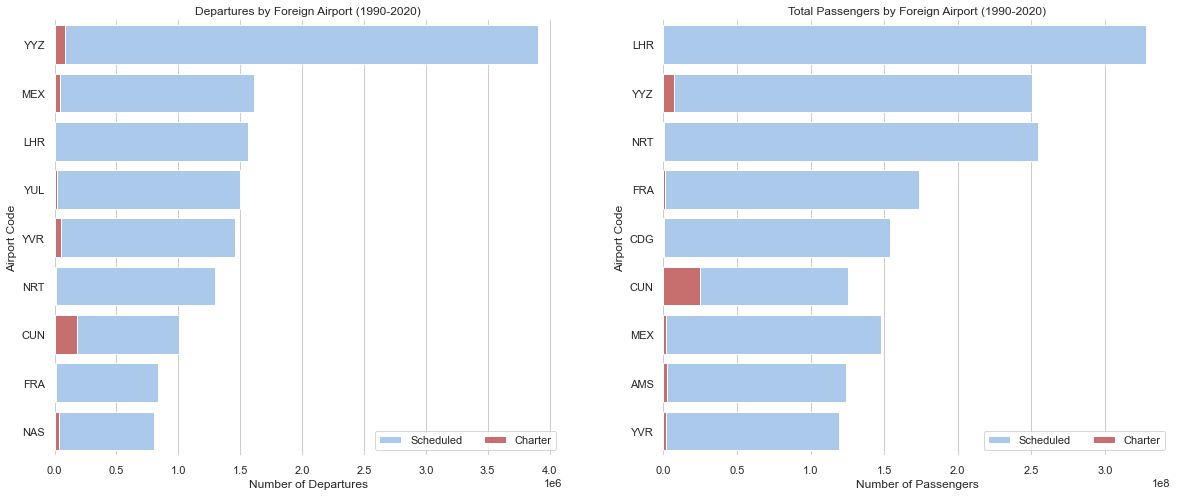

In [38]:
sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, axes = plt.subplots(nrows=1,ncols=2,figsize=(20,8))


# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(ax=axes[0], x="Scheduled", y="fg_apt", data=toptendeptfg,
            label="Scheduled", color="b")


sns.set_color_codes("muted")
sns.barplot(ax=axes[0], x="Charter", y="fg_apt", data=toptendeptfg,
            label="Charter", color="r")

# Add a legend and informative axis label
axes[0].legend(ncol=2, loc="lower right", frameon=True)
axes[0].set(ylabel="Airport Code",
            xlabel="Number of Departures", title='Departures by Foreign Airport (1990-2020)')
sns.despine(left=True, bottom=True)

# 2nd plot


sns.set_color_codes("pastel")
sns.barplot(ax=axes[1], x="Scheduled", y="fg_apt", data=toptenpassfg,
            label="Scheduled", color="b")

sns.set_color_codes("muted")
sns.barplot(ax=axes[1], x="Charter", y="fg_apt", data=toptenpassfg,
            label="Charter", color="r")

# Add a legend and informative axis label
axes[1].legend(ncol=2, loc="lower right", frameon=True)
axes[1].set(ylabel="Airport Code",
            xlabel="Number of Passengers", title='Total Passengers by Foreign Airport (1990-2020)')
sns.despine(left=True, bottom=True)

The foreign airports are a little more interesting. Heathrow has the most passengers, while Toronto and Mexico City have the most departures. I would guess bigger planes, with more passengers, are going to heathrow. Cancun has far more chartered flights and passengers than any of the other airports.

### What are some trends throughout time?

In [39]:
pts = passengers.groupby(['data_dte']).sum().reset_index()
dts = departures.groupby(['data_dte']).sum().reset_index()

[Text(0.5, 0, ''),
 Text(0, 0.5, 'Total Passengers'),
 Text(0.5, 1.0, 'Total Passengers (1990-2020)')]

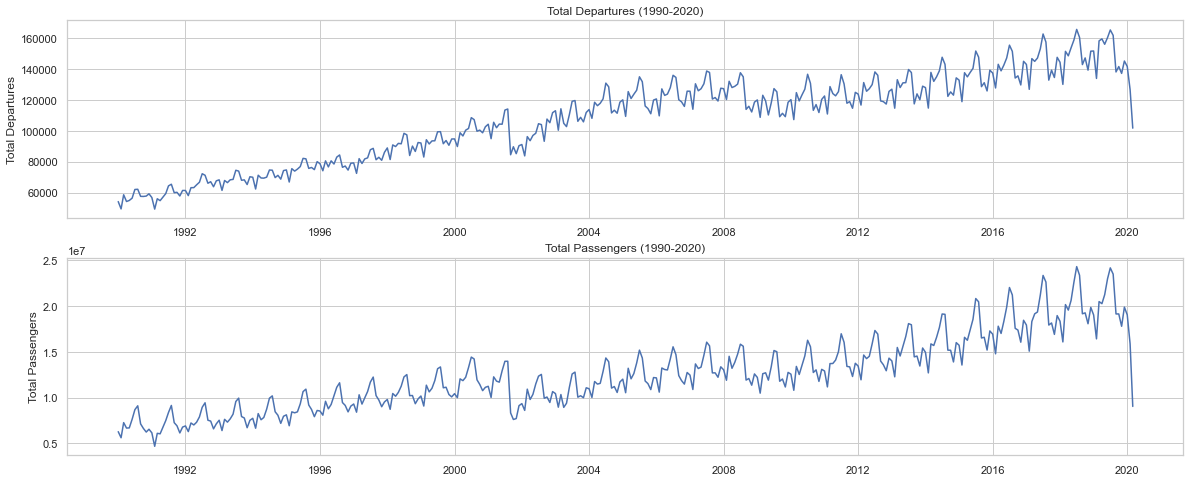

In [40]:
# Initialize the matplotlib figure
f, axes = plt.subplots(nrows=2,ncols=1,figsize=(20,8))

sns.lineplot(ax=axes[0], data=dts,x='data_dte', y='Total')
sns.lineplot(ax=axes[1], data=pts,x='data_dte', y='Total')

axes[0].set(xlabel='', ylabel='Total Departures', title='Total Departures (1990-2020)')
axes[1].set(xlabel='', ylabel='Total Passengers', title='Total Passengers (1990-2020)')

Total departures and passengers traveling outside of the US have steadily risen since 1992, with seasonal peaks and valleys becoming more pronounced over time. The only years where travel dropped were 2001 and 2020, both spurred by global events. Lets plot them with a moving average to view trends a bit better.

In [49]:
# Calculate Moving Average for Passengers and Departures Dataset

pts['Total_ma'] = pts.Total.rolling(3).mean()
dts['Total_ma'] = dts.Total.rolling(3).mean()

[Text(0.5, 0, ''),
 Text(0, 0.5, 'Total Passengers'),
 Text(0.5, 1.0, 'Total Passengers with 3 Month Moving Average (1990-2020)')]

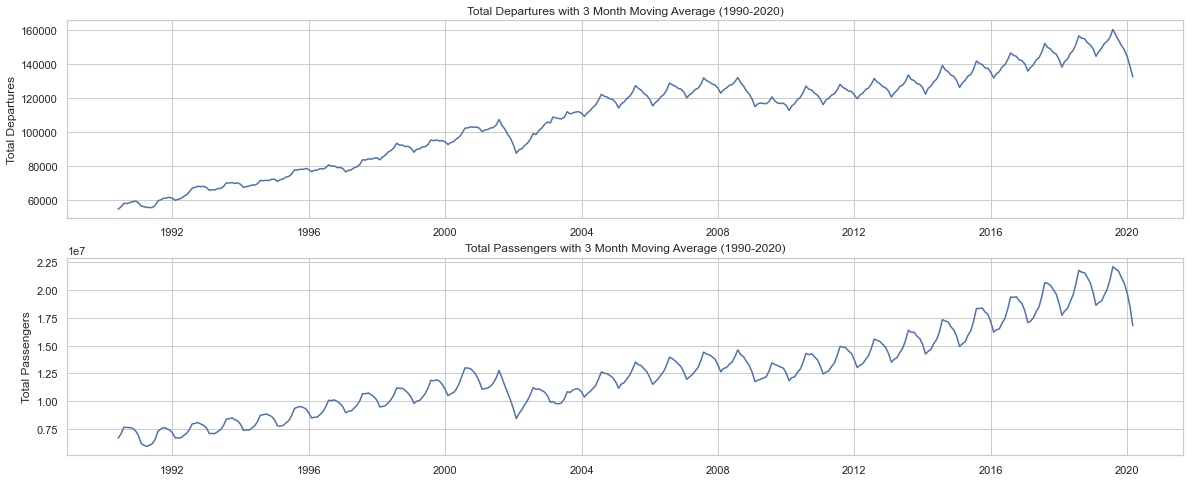

In [53]:
# Initialize the matplotlib figure
f, axes = plt.subplots(nrows=2,ncols=1,figsize=(20,8))

sns.lineplot(ax=axes[0], data=dts,x='data_dte', y='Total_ma')
sns.lineplot(ax=axes[1], data=pts,x='data_dte', y='Total_ma')

axes[0].set(xlabel='', ylabel='Total Departures', title='Total Departures with 3 Month Moving Average (1990-2020)')
axes[1].set(xlabel='', ylabel='Total Passengers', title='Total Passengers with 3 Month Moving Average (1990-2020)')

No surpirsingly, this travel data has a highly seasonal component with most of the passengers and departures taking place during a particular three month period. This leads to another good question : what is the most popular season to travel internationally?

### What is the Most Popular Month to Travel?

Let's exclude 2020 data. I'm curious about the regular trends over time and 2020 - as an extreme outlier year - will throw off the results.

[Text(0, 0.5, 'Total Departures'),
 Text(0.5, 1.0, 'Total Departures (1990-2019)')]

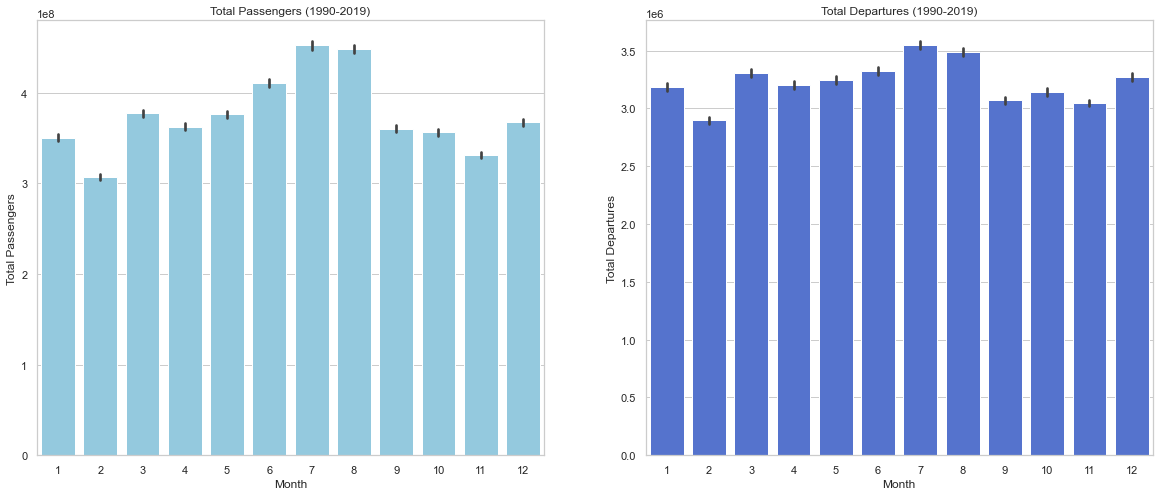

In [43]:
p2019 = passengers.loc[passengers.Year != 2020,:]
d2019 = departures.loc[departures.Year != 2020,:]

f, axes = plt.subplots(nrows=1,ncols=2,figsize=(20,8))

sns.barplot(data=p2019, x='Month', y='Total', estimator=sum, ax=axes[0], color='skyblue')
axes[0].set(ylabel='Total Passengers', title='Total Passengers (1990-2019)')
sns.barplot(data=d2019, x='Month', y='Total', estimator=sum, ax=axes[1], color='royalblue')
axes[1].set(ylabel='Total Departures', title='Total Departures (1990-2019)')

June, July, and August are the most popular months to travel, followed by the holiday season in December. The number of passengers seems to vary far more month-to-month than the number of departures, which seems to center around 35 million with the exception of June and July. Perhaps airlines fly smaller planes more often during less busy period or simply take the loss of the empty seats? It is impossible to know from this data alone.